In [8]:
from Learning_Agent import *
from GP_ucb_1 import *
from GP_ucb_2 import *
from GP_ts_1 import *
from GP_ts_2 import *
from GPUCB import *
from GPTS import *
from GPUCB_Handler import *
from GPTS_Handler import *
import Functions as f
from Enviroment import *
from Clairvoyant import *
from Class import *
import Plots as p
import warnings
warnings.filterwarnings("ignore")  # Convergence warning concerning the parameters of the GP since we are working with very large values


In [9]:
pricing_arms=[10,15,20,25,30]
advertising_arms=np.linspace(100,397,100)
sigma = 10

In [10]:
advertising_arms

array([100., 103., 106., 109., 112., 115., 118., 121., 124., 127., 130.,
       133., 136., 139., 142., 145., 148., 151., 154., 157., 160., 163.,
       166., 169., 172., 175., 178., 181., 184., 187., 190., 193., 196.,
       199., 202., 205., 208., 211., 214., 217., 220., 223., 226., 229.,
       232., 235., 238., 241., 244., 247., 250., 253., 256., 259., 262.,
       265., 268., 271., 274., 277., 280., 283., 286., 289., 292., 295.,
       298., 301., 304., 307., 310., 313., 316., 319., 322., 325., 328.,
       331., 334., 337., 340., 343., 346., 349., 352., 355., 358., 361.,
       364., 367., 370., 373., 376., 379., 382., 385., 388., 391., 394.,
       397.])

In [11]:
cl=Class()
env=Enviroment(5,100,cl)

15


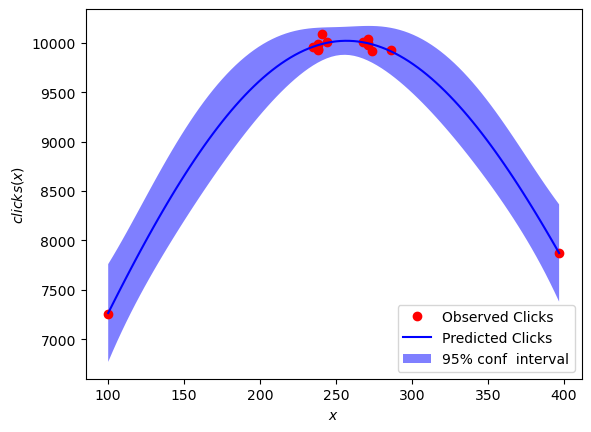

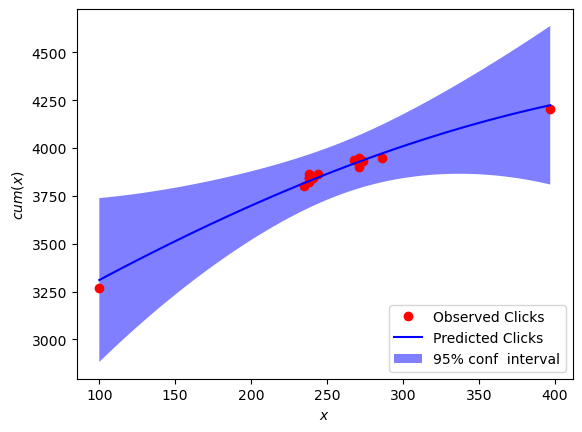

150


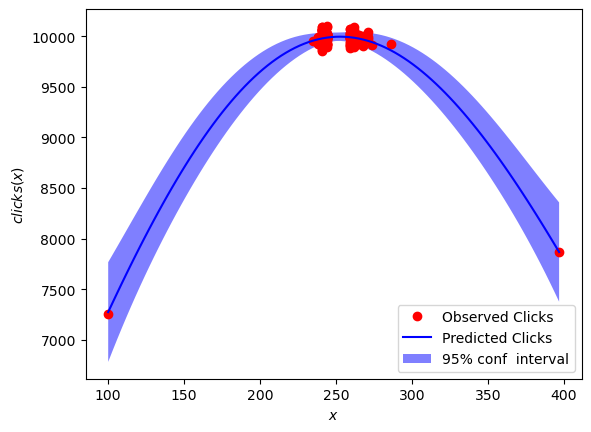

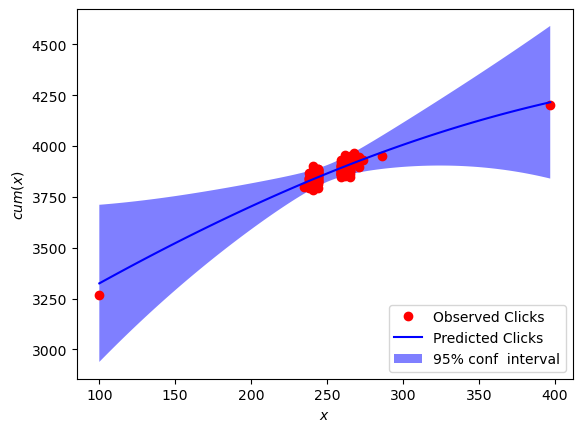

364


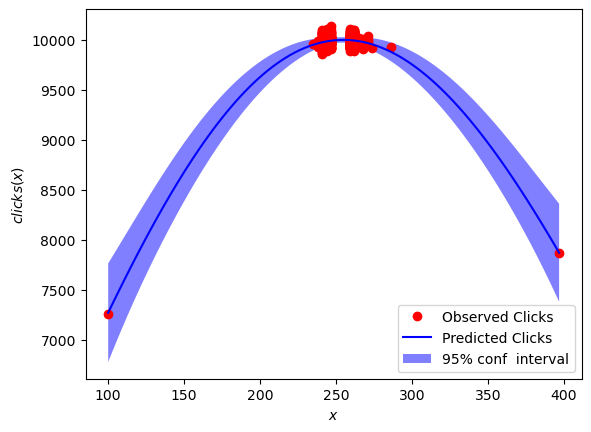

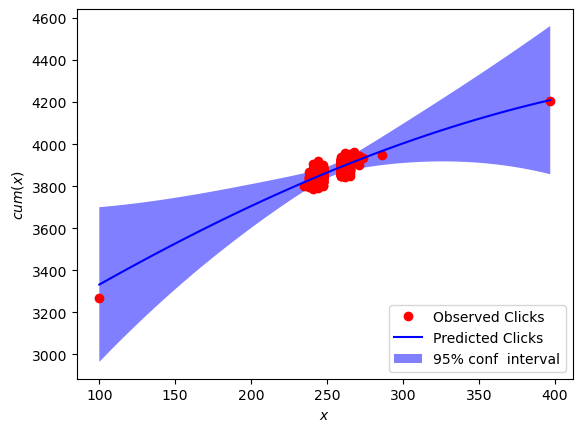

15


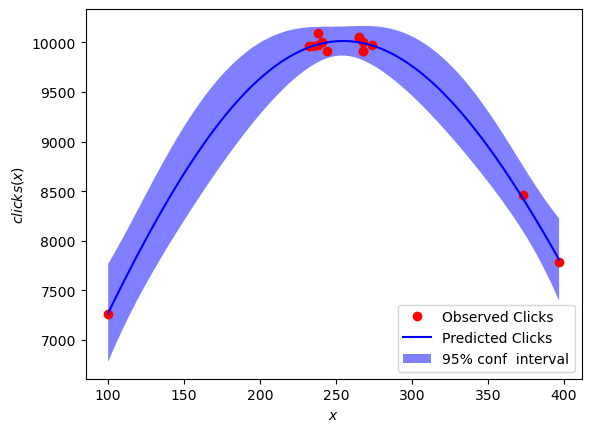

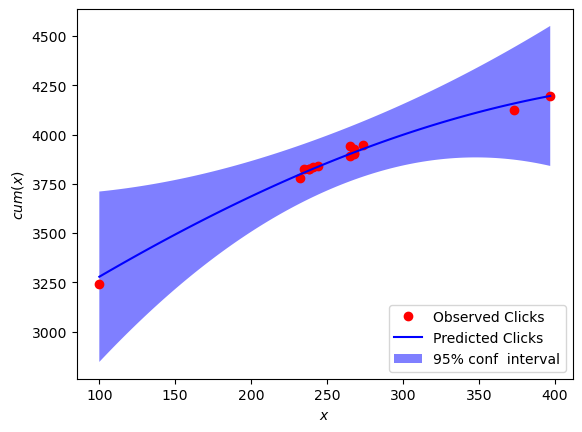

150


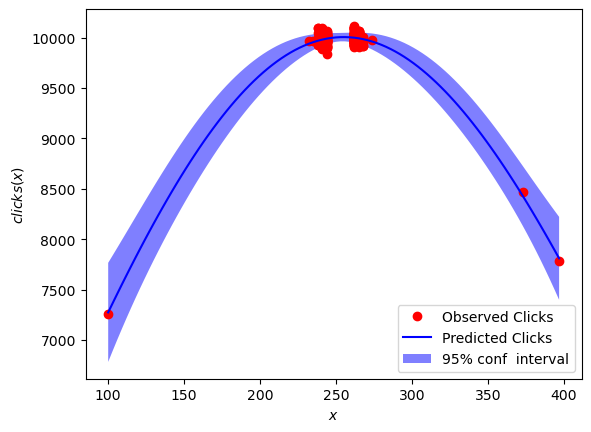

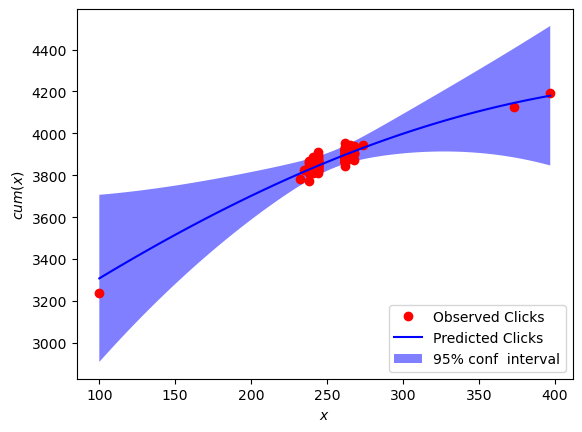

364


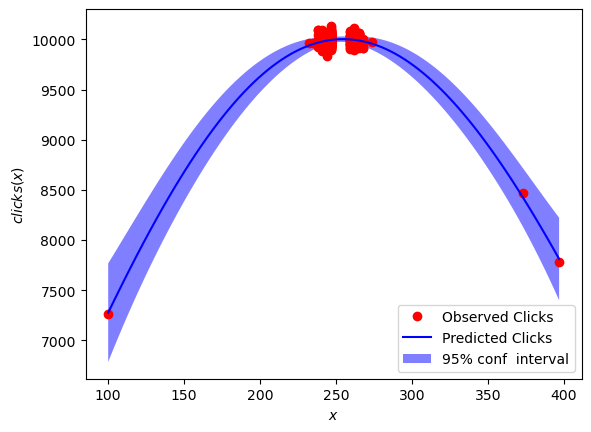

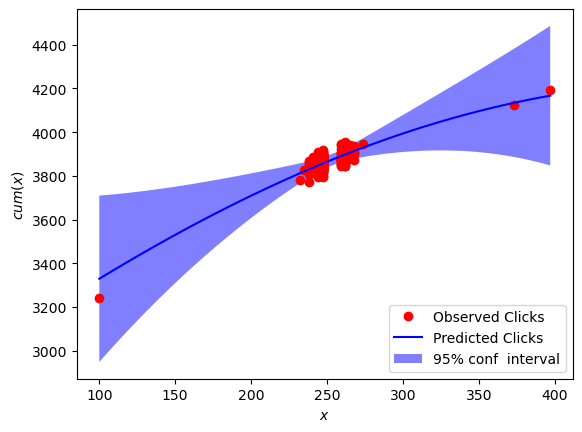

15


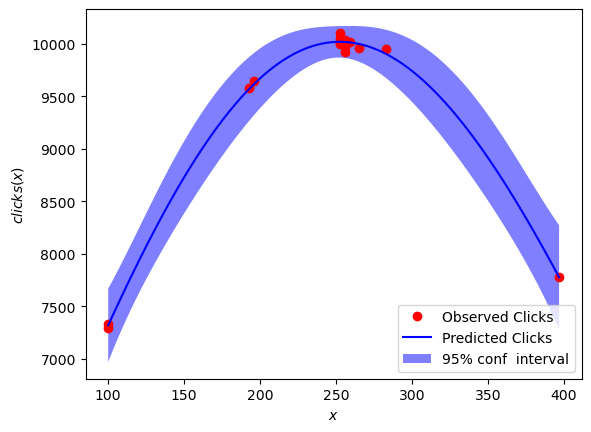

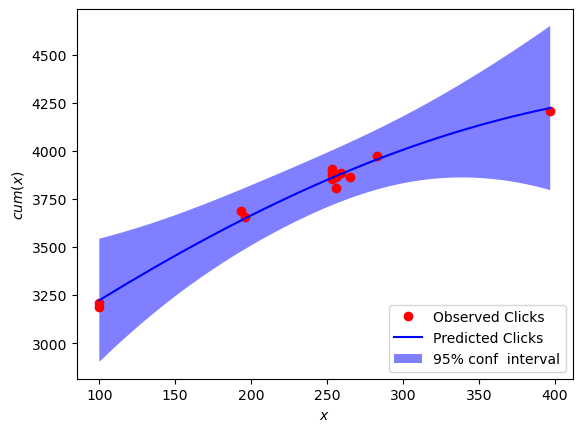

150


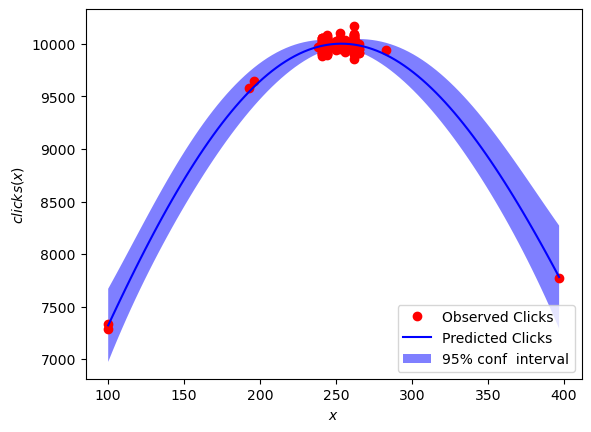

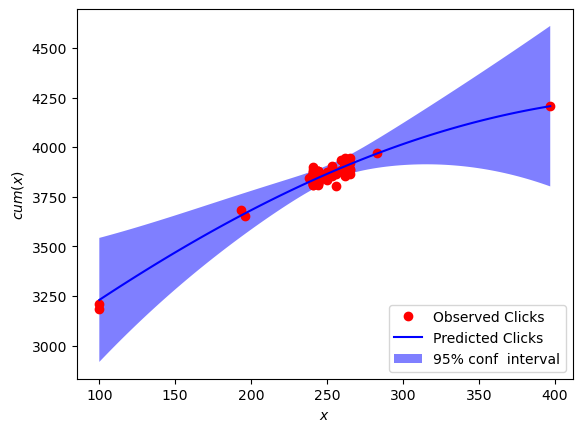

364


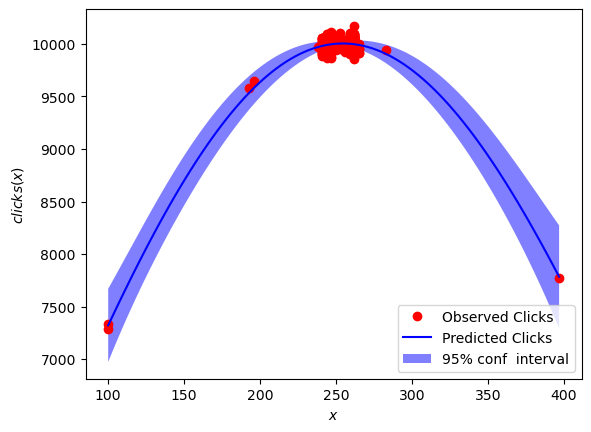

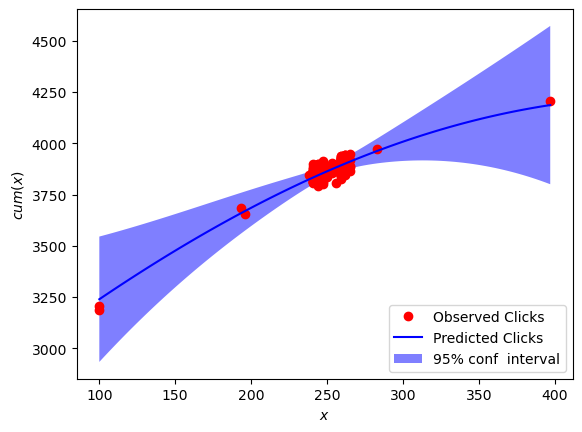

15


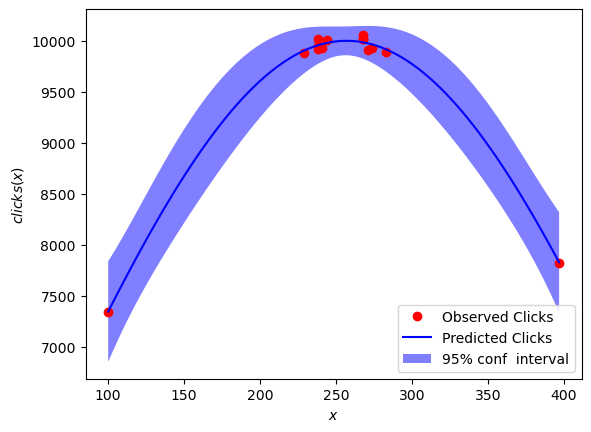

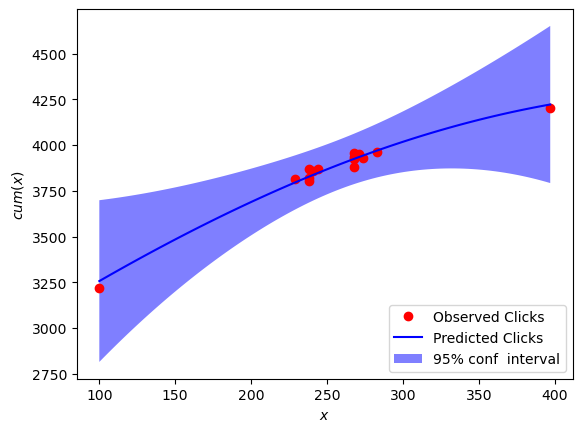

150


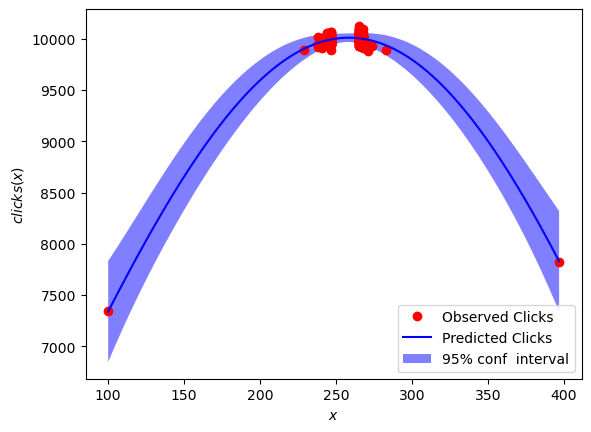

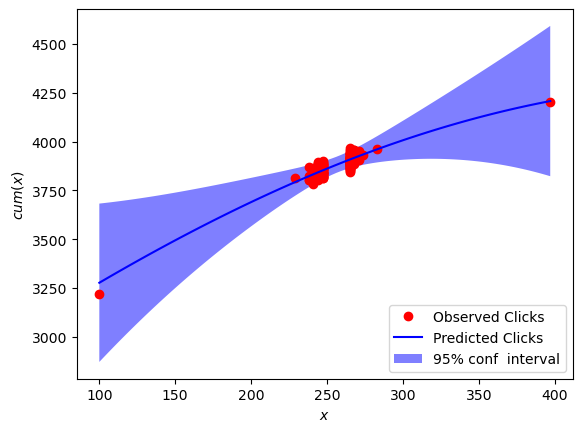

364


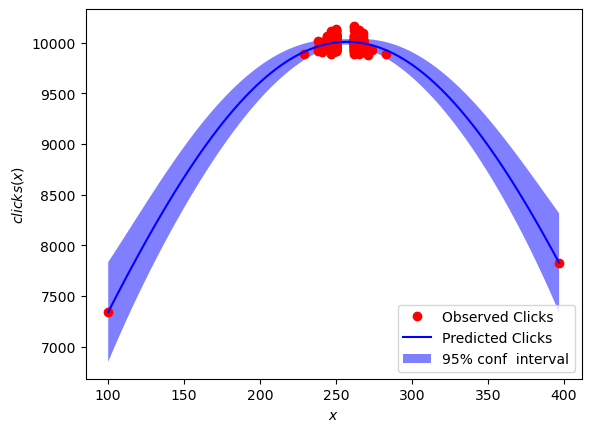

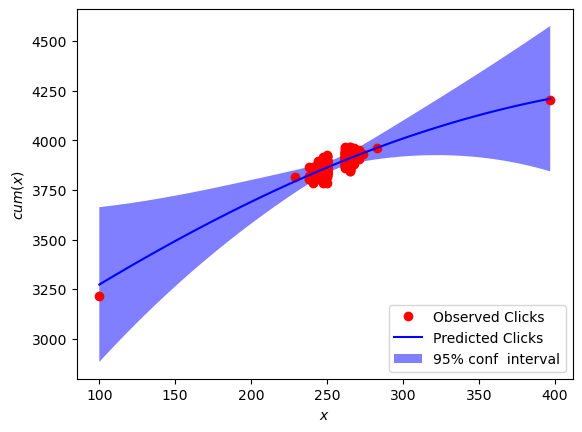

15


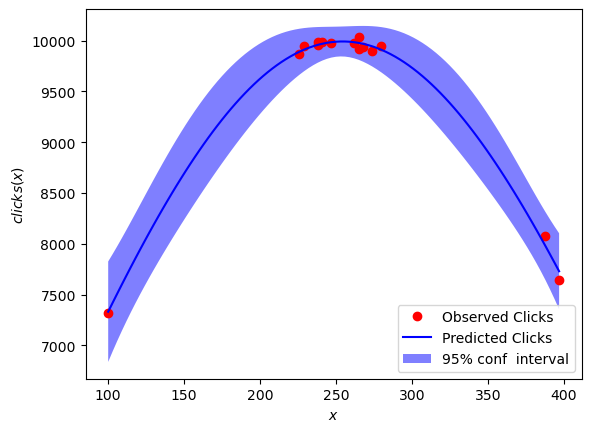

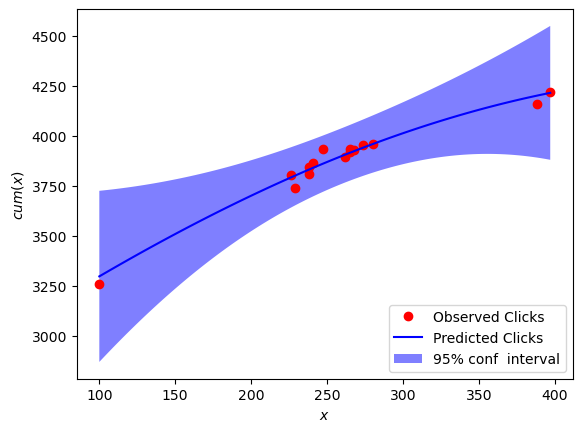

150


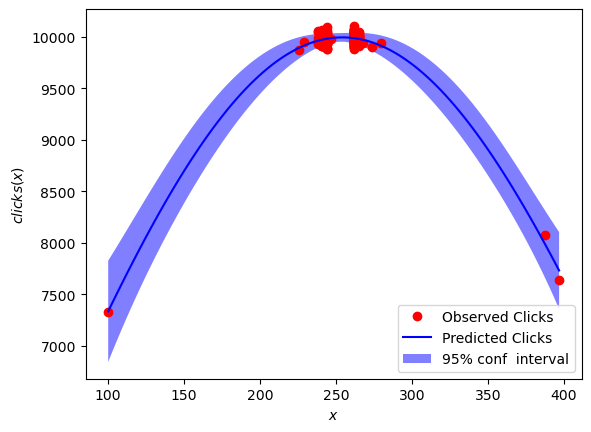

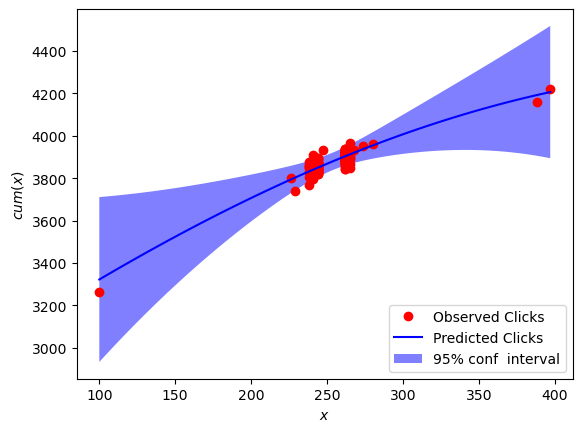

364


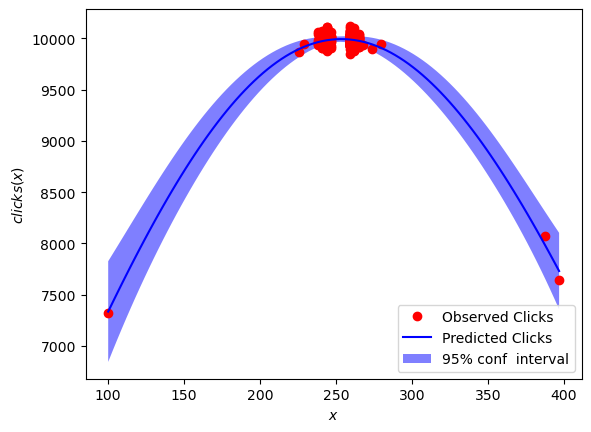

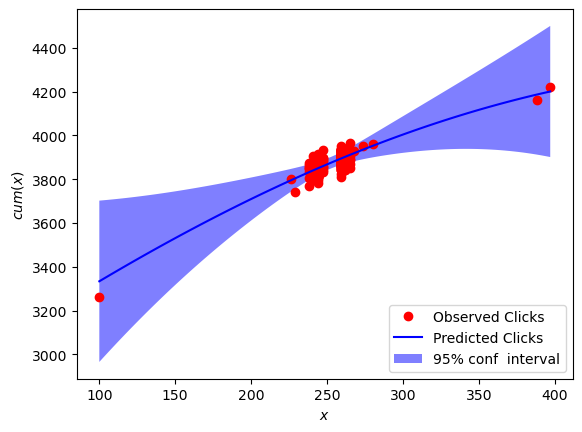

In [12]:
#UCB prova 1
runs=5
T=365
show_print=False

cum_regret_gpucb_multi=[]
cum_reward_gpucb_multi=[]
istant_regret_gpucb_multi=[]
istant_reward_gpucb_multi=[]




for r in range(runs):

    gpucb=GPUCB_Handler(advertising_arms)

    clairv_price=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid=Clairvoyant_bid(env,(1,1), advertising_arms)

    opt_price=clairv_price.optimal_arm()

    opt_bid=clairv_bid.optimal_arm(opt_price)

    expected_optimal_rew=clairv_bid.expected_reward(opt_bid,opt_price)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPUCB=[0]



    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_GPUCB=[]

    regret_GPUCB=np.zeros(T)+expected_optimal_rew

    reward_GPUCB=[]



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)

        pulled_arm_GPUCB=gpucb.pull_arm(opt_price)
        rewards_GPUCB=env.round(opt_price, pulled_arm_GPUCB)
        gpucb.update(pulled_arm_GPUCB ,rewards_GPUCB )

        cum_reward_GPUCB.append(cum_reward_GPUCB[t]+rewards_GPUCB[3])
        cum_regret_GPUCB.append(cumulative_optimal_rew[t+1]-cum_reward_GPUCB[t+1])
        regret_GPUCB[t]=regret_GPUCB[t]-rewards_GPUCB[3]
        reward_GPUCB.append(rewards_GPUCB[3])
    
        
       



  

    cum_regret_gpucb_multi.append(cum_regret_GPUCB)
    cum_reward_gpucb_multi.append(cum_reward_GPUCB)
    istant_regret_gpucb_multi.append(regret_GPUCB)
    istant_reward_gpucb_multi.append(reward_GPUCB)


15


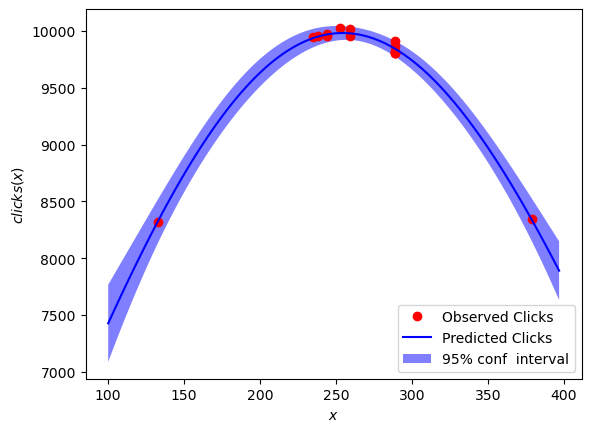

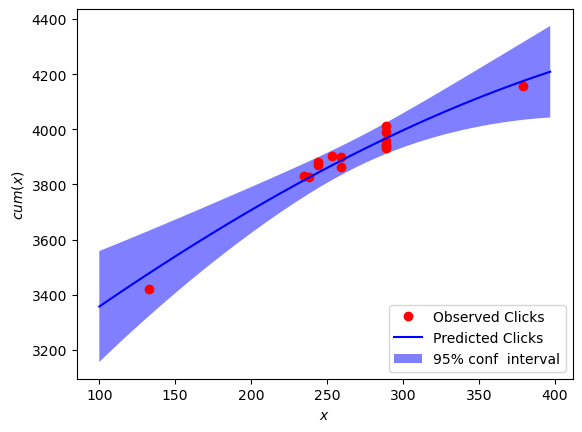

150


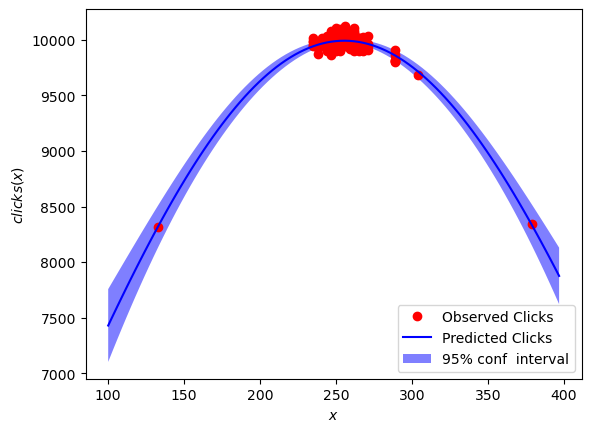

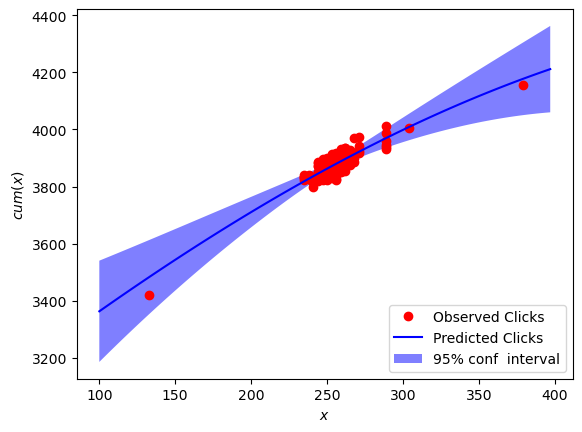

364


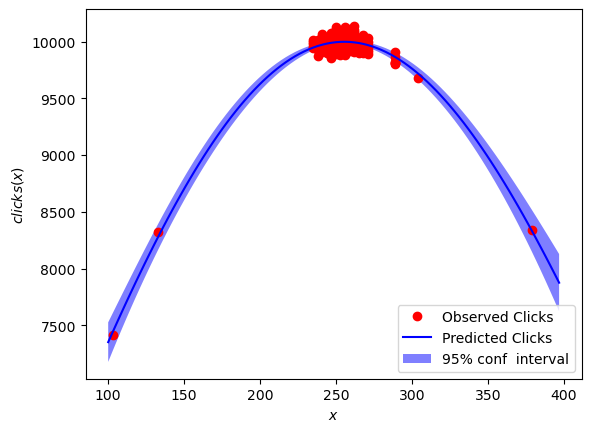

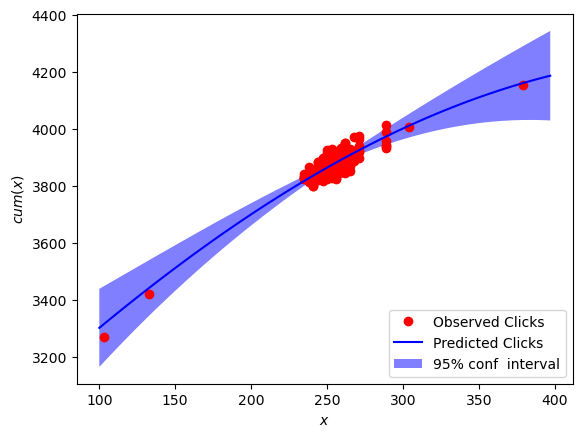

15


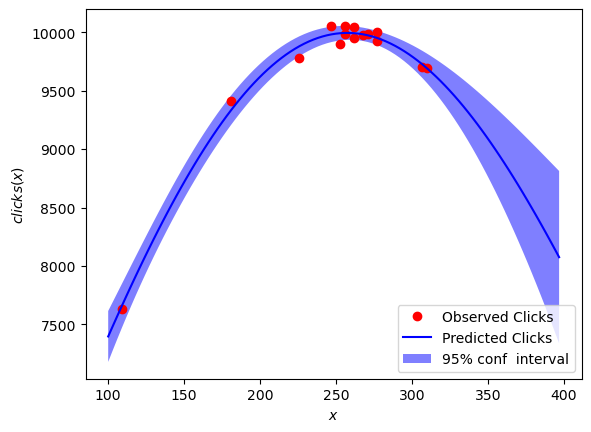

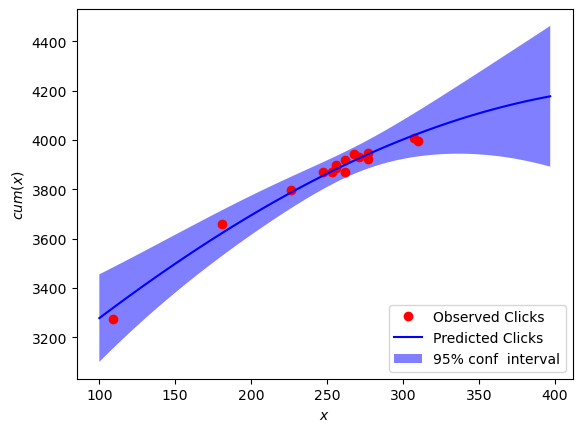

150


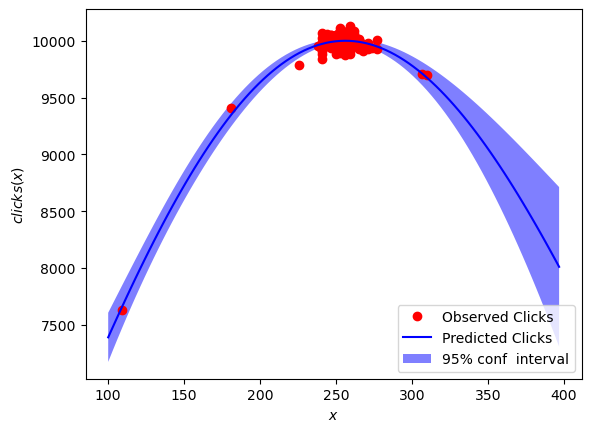

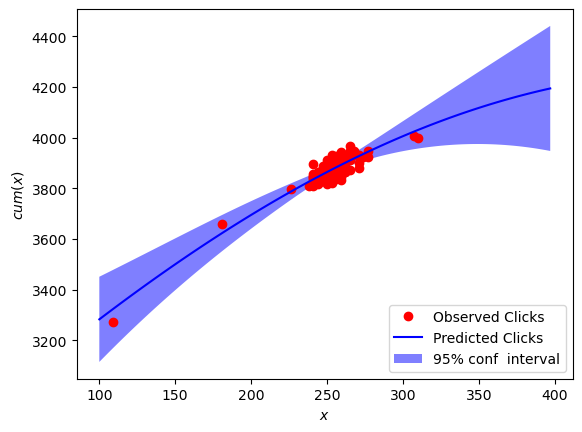

364


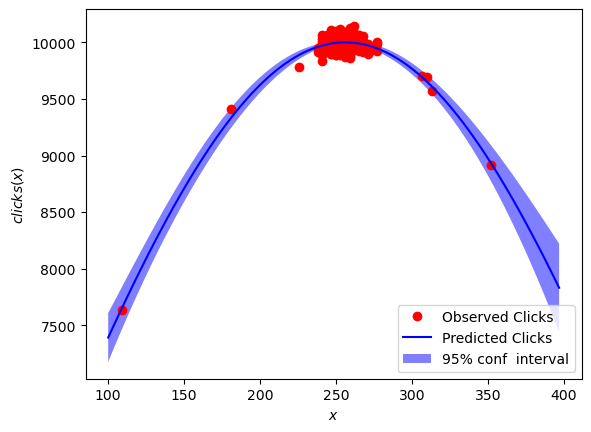

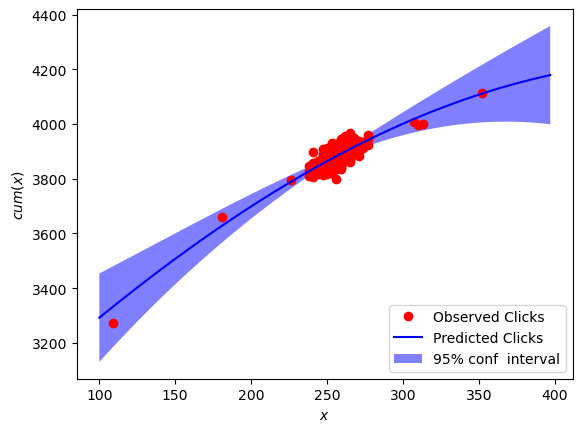

15


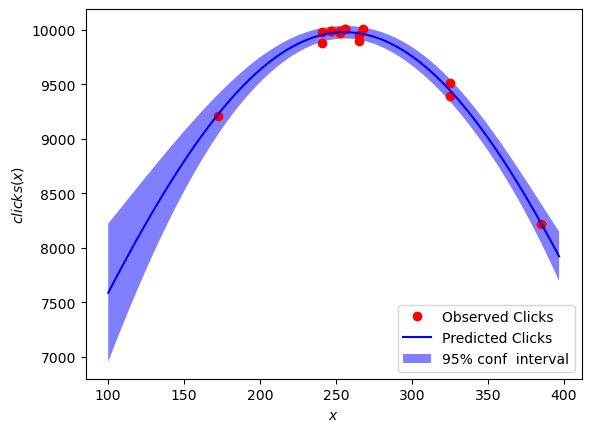

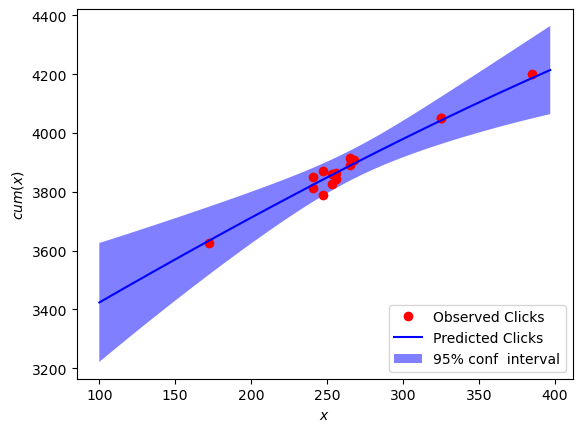

150


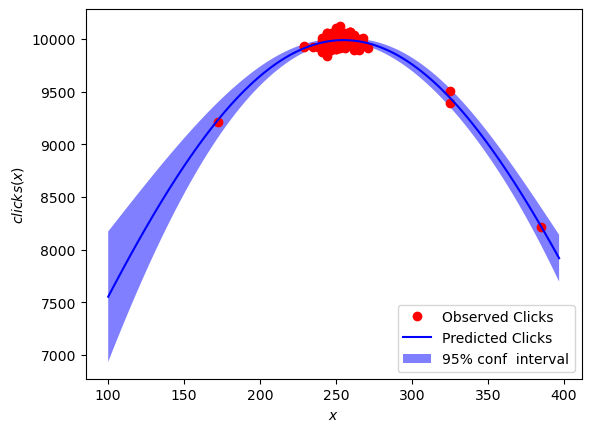

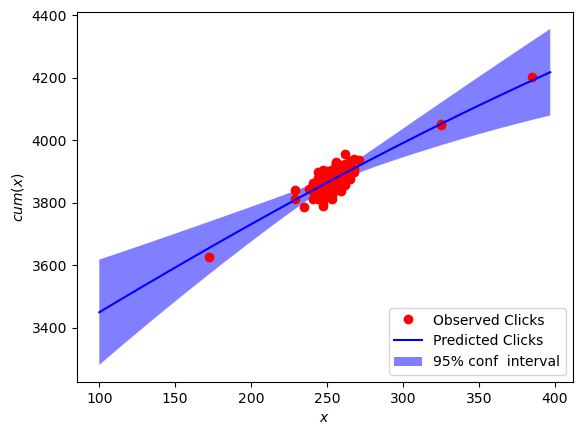

364


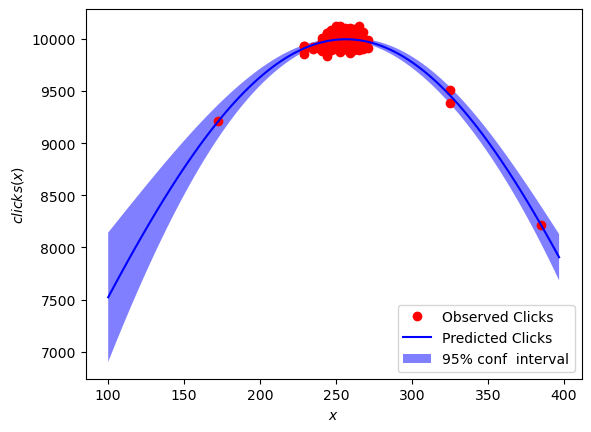

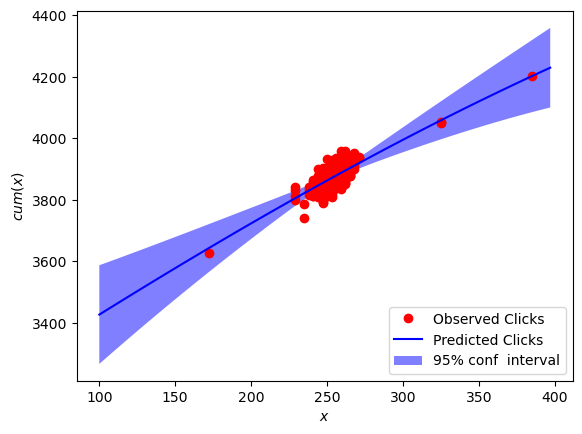

15


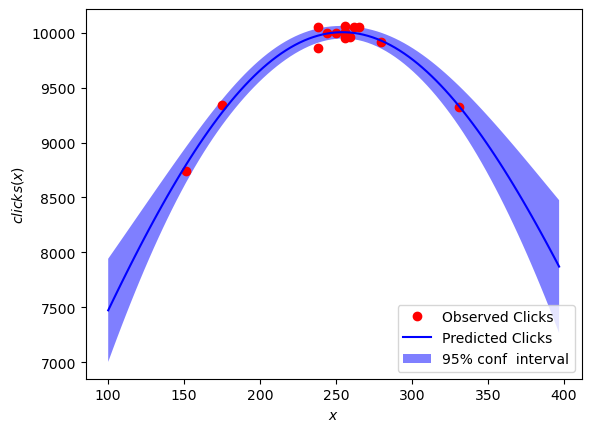

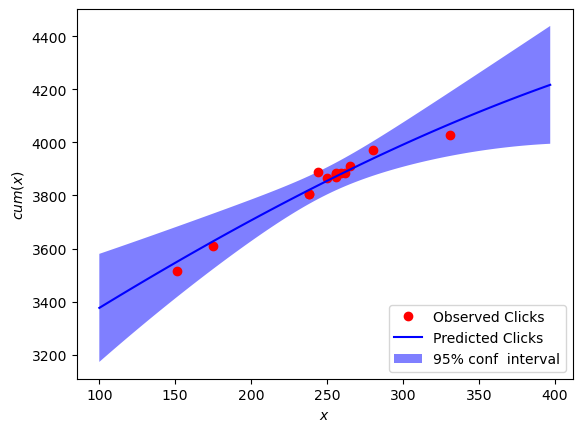

150


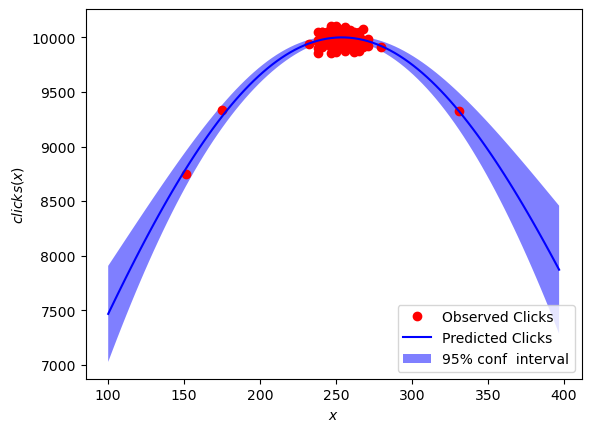

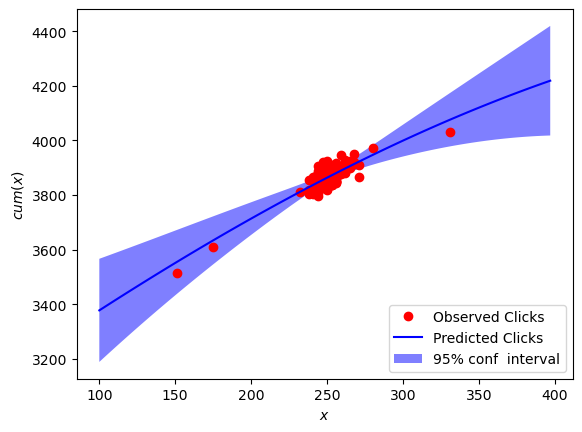

364


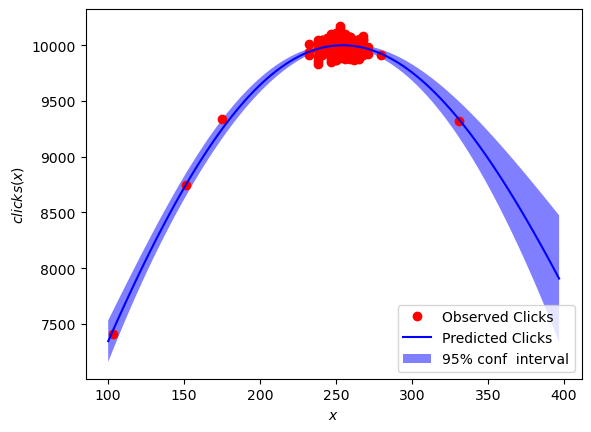

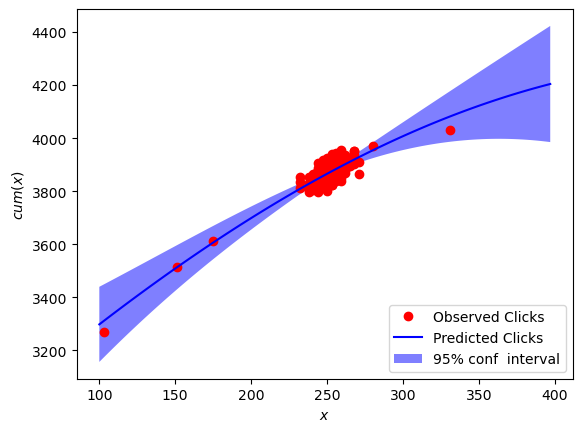

15


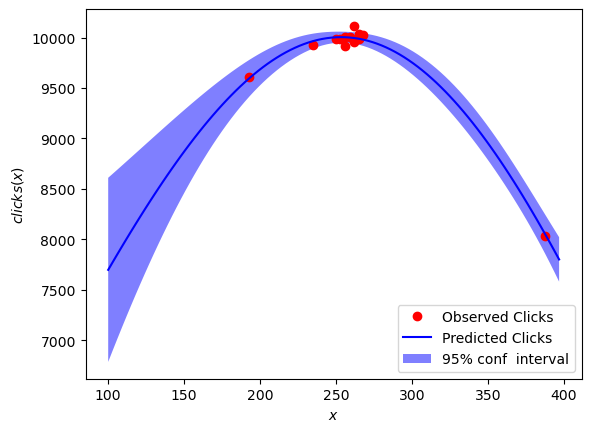

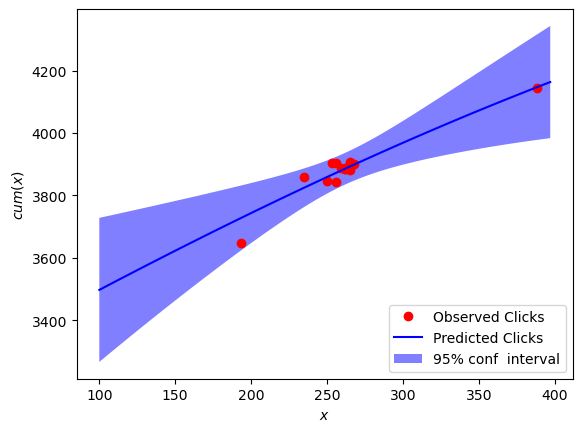

150


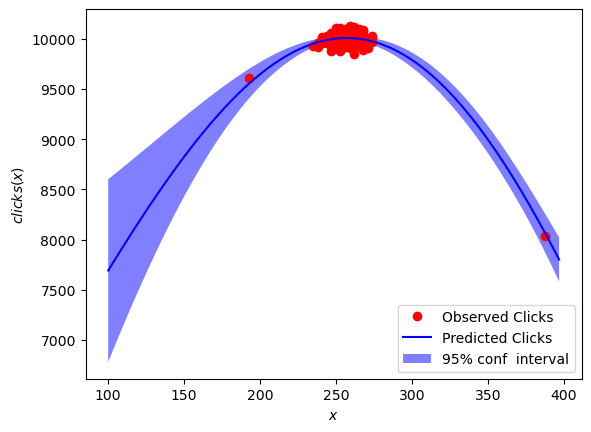

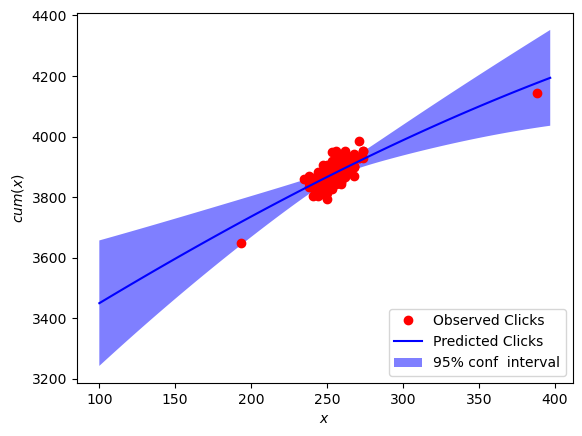

364


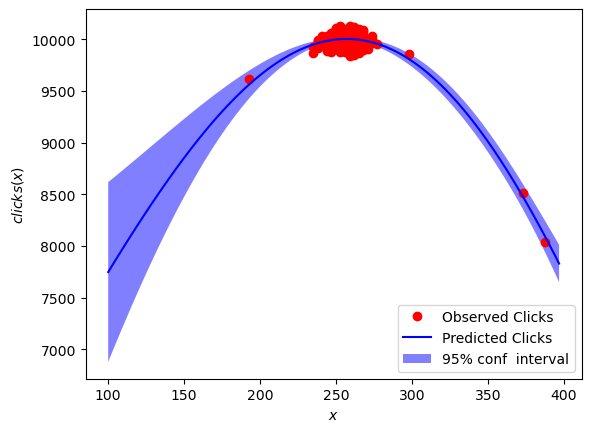

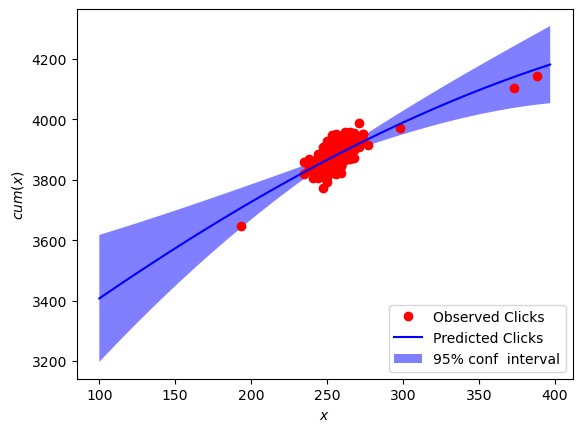

In [13]:
runs=5
T=365
show_print=False

cum_regret_gpts_multi=[]
cum_reward_gpts_multi=[]
istant_regret_gpts_multi=[]
istant_reward_gpts_multi=[]




for r in range(runs):

    gpts=GPTS_Handler(advertising_arms)

    clairv_price=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid=Clairvoyant_bid(env,(1,1), advertising_arms)

    opt_price=clairv_price.optimal_arm()

    opt_bid=clairv_bid.optimal_arm(opt_price)

    expected_optimal_rew=clairv_bid.expected_reward(opt_bid,opt_price)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPTS=[0]



    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_GPTS=[]

    regret_GPTS=np.zeros(T)+expected_optimal_rew

    reward_GPTS=[]



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)

        pulled_arm_GPTS=gpts.pull_arm(opt_price)
        rewards_GPTS=env.round(opt_price, pulled_arm_GPTS)
        gpts.update(pulled_arm_GPTS ,rewards_GPTS )

        cum_reward_GPTS.append(cum_reward_GPTS[t]+rewards_GPTS[3])
        cum_regret_GPTS.append(cumulative_optimal_rew[t+1]-cum_reward_GPTS[t+1])
        regret_GPTS[t]=regret_GPTS[t]-rewards_GPTS[3]
        reward_GPTS.append(rewards_GPTS[3])
        
      



  

    cum_regret_gpts_multi.append(cum_regret_GPTS)
    cum_reward_gpts_multi.append(cum_reward_GPTS)
    istant_regret_gpts_multi.append(regret_GPTS)
    istant_reward_gpts_multi.append(reward_GPTS)


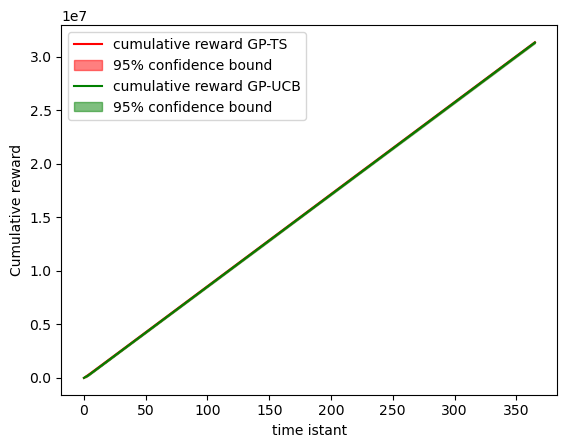

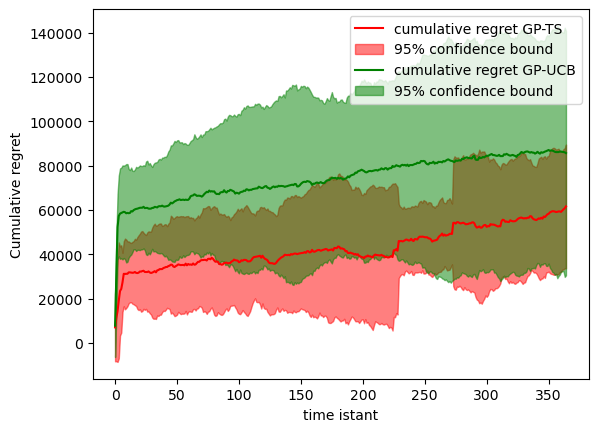

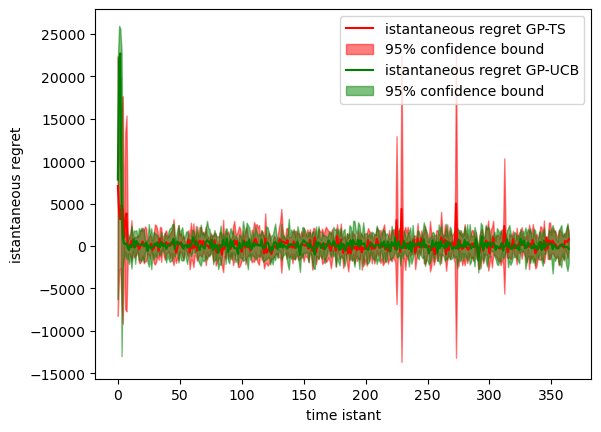

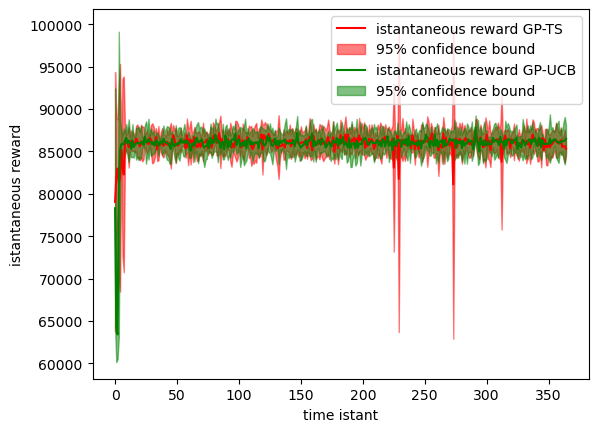

In [14]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_gpts_multi)
arr2=np.array(cum_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative reward GP-TS", "cumulative reward GP-UCB","Cumulative reward")

x=[i for i in range(T)]
arr1=np.array(cum_regret_gpts_multi)
arr2=np.array(cum_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative regret GP-TS", "cumulative regret GP-UCB","Cumulative regret")

x=[i for i in range(T)]
arr1=np.array(istant_regret_gpts_multi)
arr2=np.array(istant_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous regret GP-TS", "istantaneous regret GP-UCB","istantaneous regret")

x=[i for i in range(T)]
arr1=np.array(istant_reward_gpts_multi)
arr2=np.array(istant_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous reward GP-TS", "istantaneous reward GP-UCB","istantaneous reward")

